In [1]:
import pandas as pd
import requests
import datetime
import seaborn as sns
import matplotlib as plt

In [2]:
with requests.get("https://raw.githubusercontent.com/pesikj/progr2-python/master/data/air_polution_ukol.csv") as r:
  open("air_polution_ukol.csv", 'w', encoding="utf-8").write(r.text)

In [3]:
data = pd.read_csv("air_polution_ukol.csv")
data

,date,pm25
0,2021/9/1,34.0
1,2021/9/2,38.0
2,2021/9/3,44.0
3,2021/9/4,52.0
4,2021/9/5,59.0
...,...,...
2679,2015/3/30,NaN
2680,2015/3/31,NaN
2681,2014/6/24,NaN
2682,2014/6/25,NaN


In [4]:
#vytvoření sloupců s rokem a měsícem
data["date"] = pd.to_datetime(data["date"])
data["year"] = data["date"].dt.year
data["month"] = data["date"].dt.month
data

,date,pm25,year,month
0,2021-09-01,34.0,2021,9
1,2021-09-02,38.0,2021,9
2,2021-09-03,44.0,2021,9
3,2021-09-04,52.0,2021,9
4,2021-09-05,59.0,2021,9
...,...,...,...,...
2679,2015-03-30,NaN,2015,3
2680,2015-03-31,NaN,2015,3
2681,2014-06-24,NaN,2014,6
2682,2014-06-25,NaN,2014,6


In [10]:
#vytvoření kontingenční tabulky
pivot = pd.pivot_table(data, index=("year"), columns=("month"), values="pm25", aggfunc="mean")
pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2014,98.548387,75.750000,93.366667,59.896552,32.709677,27.740741,33.000000,22.774194,38.866667,71.064516,75.600000,53.178571
2015,54.290323,87.000000,82.863636,55.750000,46.400000,45.566667,38.838710,47.483871,35.266667,71.354839,54.533333,58.900000
2016,80.454545,56.275862,77.806452,58.733333,51.322581,40.400000,49.935484,41.903226,64.133333,53.483871,62.666667,64.548387
2017,94.387097,95.178571,50.774194,54.444444,NaN,36.111111,33.000000,35.806452,48.115385,44.740741,58.800000,49.400000
2018,55.967742,80.607143,78.419355,49.833333,51.419355,45.133333,40.612903,35.580645,43.900000,65.200000,79.766667,44.133333
2019,48.000000,74.285714,38.322581,58.076923,37.419355,40.222222,42.666667,36.806452,28.413793,46.935484,54.766667,50.551724
2020,70.709677,26.517241,51.034483,43.095238,31.677419,30.966667,26.612903,37.548387,35.766667,37.800000,60.366667,80.000000
2021,NaN,80.750000,57.760000,45.033333,22.935484,43.700000,32.290323,26.096774,43.962963,NaN,NaN,NaN


<AxesSubplot:xlabel='month', ylabel='year'>

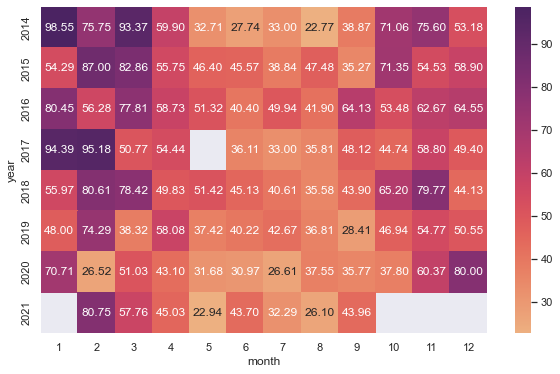

In [13]:
#zobrazení heatmapy, nastavení velikosti grafu
sns.set(rc={'figure.figsize':(10,6)})

sns.heatmap(pivot, annot=True, fmt=".2f", cmap="flare")



In [ ]:
#vytvoření sloupce s dny v týdnu
day_of_week={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
data["wk_name"] = data["date"].dt.dayofweek.map(day_of_week)
data["wk_num"] = data["date"].dt.dayofweek
data

,date,pm25,year,month,wk_day,wk_name,wk_num
0,2021-09-01,34.0,2021,9,Wednesday,Wednesday,2
1,2021-09-02,38.0,2021,9,Thursday,Thursday,3
2,2021-09-03,44.0,2021,9,Friday,Friday,4
3,2021-09-04,52.0,2021,9,Saturday,Saturday,5
4,2021-09-05,59.0,2021,9,Sunday,Sunday,6
...,...,...,...,...,...,...,...
2679,2015-03-30,NaN,2015,3,Monday,Monday,0
2680,2015-03-31,NaN,2015,3,Tuesday,Tuesday,1
2681,2014-06-24,NaN,2014,6,Tuesday,Tuesday,1
2682,2014-06-25,NaN,2014,6,Wednesday,Wednesday,2


In [ ]:
#kontingenční tabulka pro dny v týdnu
pivot_dny = pd.pivot_table(data, index=("wk_num","wk_day"), values="pm25", aggfunc="mean")
pivot_dny

,,pm25
wk_num,wk_day,
0,Monday,49.556757
1,Tuesday,49.910326
2,Wednesday,51.663978
3,Thursday,53.178378
4,Friday,52.888889
5,Saturday,53.399464
6,Sunday,51.965054
